<a href="https://colab.research.google.com/github/reddykushal7781/Whether_Presiction_RNN/blob/main/RNN%2BWeather%2BPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Seattle Weather Prediction

This is a dataset typically used to predict weather conditions based on historical data. It provides information about various weather-related parameters and the occurrence of precipitation (rain or no rain) in Seattle, Washington.



Data Characteristics:

Historical weather observations.
Features such as:

1. Date
2. Precipitation amount
3. Minimum and maximum temperature
4. Cloud cover
5. Wind speed
6. Humidity

A **Recurrent Neural Network (RNN)** is a type of artificial neural network specifically designed for sequential or time-series data. Unlike traditional feedforward neural networks, RNNs have connections that allow information to persist across time steps, making them well-suited for tasks where context or order matters, such as:

- Language modeling
- Speech recognition
- Time-series forecasting
- Video analysis

### Key Features of RNNs:
1. **Recurrent Connections:**
   - RNNs process sequences by maintaining a hidden state, which acts as memory. This hidden state is updated at each time step, allowing the network to "remember" previous inputs.

2. **Shared Weights:**
   - The same set of weights is used across all time steps, which reduces the number of parameters and enables the network to generalize better for sequential patterns.

3. **Sequence-to-Sequence Processing:**
   - RNNs can handle variable-length input and output sequences, making them versatile for different types of sequence-related problems.

### RNN Architecture:
The architecture of an RNN typically involves:
- **Input Layer:** Accepts sequential data.
- **Hidden Layer:** Recursively processes input and previous hidden state to capture temporal dependencies.
- **Output Layer:** Produces output based on the hidden state.

The mathematical representation for a single time step \( t \) is:
\[
h_t = \sigma(W_{ih}x_t + W_{hh}h_{t-1} + b_h)
\]
\[
y_t = \sigma(W_{ho}h_t + b_o)
\]
Where:
- \( h_t \): Hidden state at time \( t \)
- \( x_t \): Input at time \( t \)
- \( W_{ih}, W_{hh}, W_{ho} \): Weight matrices
- \( b_h, b_o \): Bias terms
- \( \sigma \): Activation function

### Challenges with RNNs:
1. **Vanishing/Exploding Gradients:**
   - When processing long sequences, gradients can become too small (vanish) or too large (explode) during backpropagation, making training difficult.

2. **Long-Term Dependencies:**
   - Standard RNNs struggle to capture dependencies across long sequences.

### Solutions:
- **Long Short-Term Memory (LSTM):** Adds gating mechanisms to control the flow of information, effectively handling long-term dependencies.
- **Gated Recurrent Unit (GRU):** A simpler alternative to LSTM with fewer parameters.

RNNs, along with their variants like LSTMs and GRUs, are widely used in tasks involving sequential data, such as language translation, sentiment analysis, and stock price prediction.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = "/content/drive/MyDrive/python/seattle-weather.csv"
df = pd.read_csv(path)
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [5]:
df.isnull().sum()

,0
date,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0


In [6]:
df.duplicated().sum()

0

In [7]:
df.shape

(1461, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [9]:
training_set = df.iloc[:,2:3].values
training_set

array([[12.8],
       [10.6],
       [11.7],
       ...,
       [ 7.2],
       [ 5.6],
       [ 5.6]])

In [10]:
len(training_set)

1461

In [11]:
def df_to_XY(df, window_size = 10):
    X_train = []
    y_train = []

    for i in range (10, len(training_set)):
        X_train.append(training_set[i-10:i,0])
        y_train.append(training_set[i,0])

    X_train, y_train = np.array(X_train), np.array(y_train)
    return X_train, y_train

In [12]:
WINDOW = 10
X,y = df_to_XY(df, WINDOW)
print(len(X), len(y))


1451 1451


In [13]:
X_train = X[:800]
y_train = y[:800]

In [14]:
X_val = X[800:1000]
y_val = y[800:1000]

In [15]:
X_test = X[1000:]
y_test = y[1000:]

In [16]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [17]:
# build the RNN

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [18]:
import warnings
warnings.filterwarnings('ignore')

regressor = Sequential()


In [19]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [20]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [ ]:
history = regressor.fit(X_train, y_train,validation_data=(X_val, y_val), epochs = 100, batch_size = 32)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 238.0495 - val_loss: 208.9429
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 81.0070 - val_loss: 133.3525
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 62.8030 - val_loss: 110.0370
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 59.3250 - val_loss: 97.8393
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 57.6871 - val_loss: 88.4849
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 52.6660 - val_loss: 84.2508
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 55.2036 - val_loss: 80.4490
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 60.7256 - val_loss: 77.6675
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 55.3386 - val_loss: 77.4913
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 52.9210 - val_loss: 76.4031
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 52.6225 - val_loss: 76.6083
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━

In [ ]:
his = pd.DataFrame(history.history)
his

,loss,val_loss
0,192.235931,208.942871
1,77.087997,133.352524
2,62.061172,110.037033
3,56.626816,97.839287
4,55.495636,88.484901
...,...,...
95,9.027203,10.148209
96,9.624079,10.254648
97,8.810661,10.016407
98,9.543358,10.658108


<Axes: title={'center': 'Train_loss and Val_loss'}>

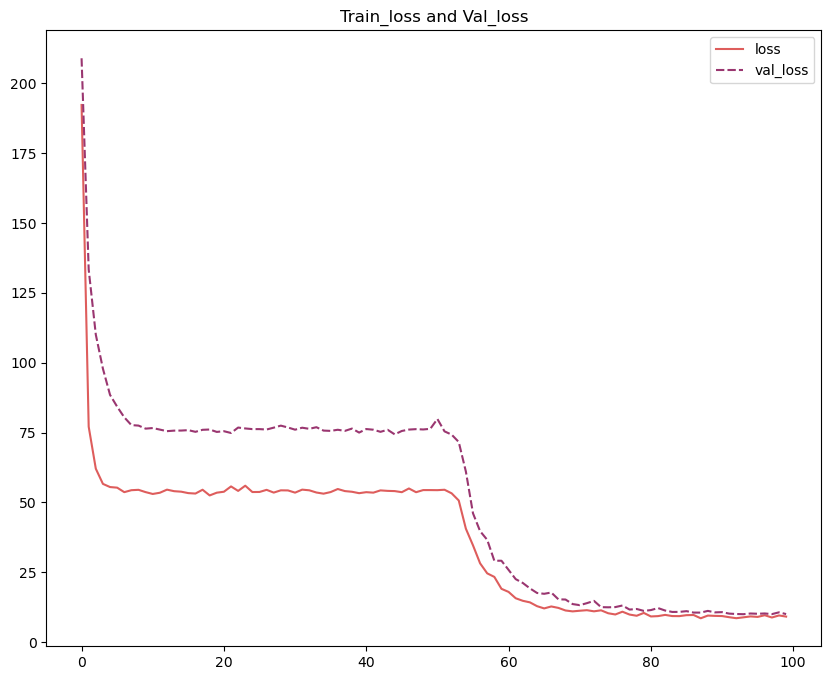

In [ ]:
import seaborn as sns
his.columns

history_loss = his[['loss','val_loss']]
fig, axes = plt.subplots(1,1, figsize = (10,8))
plt.subplot(1,1,1)
plt.title('Train_loss and Val_loss')
sns.lineplot(history_loss, palette = 'flare')

In [ ]:
train_pred = regressor.predict(X_train).flatten()
val_pred = regressor.predict(X_val).flatten()
test_pred = regressor.predict(X_test).flatten()

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
pred = np.concatenate([train_pred, val_pred, test_pred])
df_pred = pd.DataFrame(df['temp_max'].copy())
df_pred.columns = ['actual']
df_pred = df_pred[WINDOW:]
df_pred['predicted'] = pred

In [ ]:
df_pred

,actual,predicted
10,6.1,6.673398
11,6.1,5.982310
12,5.0,6.416317
13,4.4,5.741249
14,1.1,4.896631
...,...,...
1456,4.4,4.730323
1457,5.0,4.383065
1458,7.2,4.730356
1459,5.6,7.039350


<Axes: title={'center': 'Test Result'}>

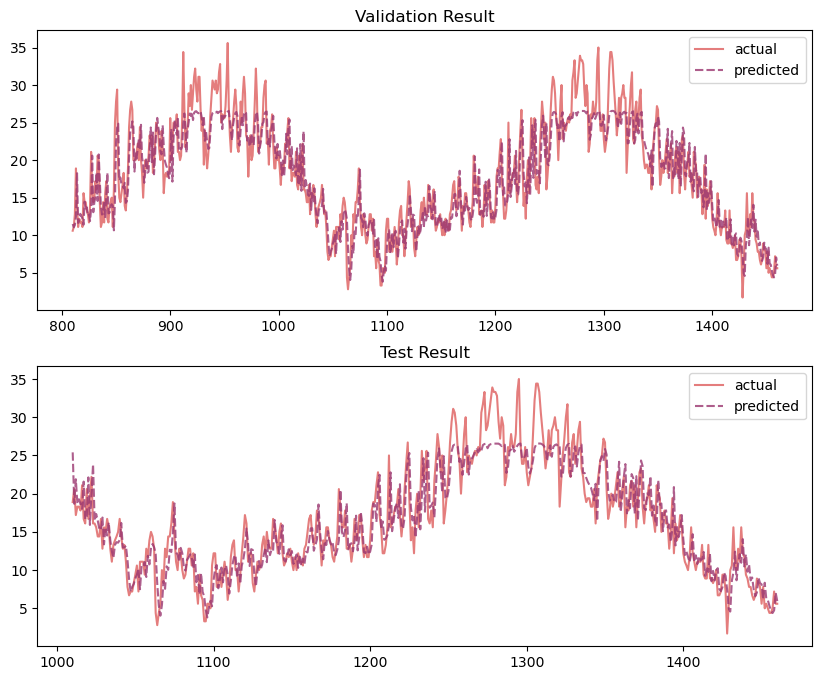

In [ ]:
fig,axes = plt.subplots(2,1, figsize = (10,8))


plt.subplot(2,1,1)
plt.title('Validation Result')
sns.lineplot(df_pred[800:], alpha = 0.8, palette = 'flare', linestyle = None)

plt.subplot(2,1,2)
plt.title('Test Result')
sns.lineplot(df_pred[1000:], alpha = 0.8, palette = 'flare', linestyle = None)


The RNN model demonstrated strong consistency between training, validation, and test predictions, suggesting effective learning of temperature trends. The similar prediction patterns across datasets indicate that the model generalizes well and avoids overfitting.

The model's architecture, combined with careful preprocessing and optimal hyperparameters, allowed it to learn the temporal relationships in the dataset effectively. This capability is evident in its accurate predictions across unseen data.

Performance metrics such as RMSE and MAE were comparable across datasets, confirming the model's robustness. The RNN successfully captured seasonal temperature trends, with no significant anomalies observed in predictions.

While the predictions are accurate, the model occasionally underrepresents extreme temperature variations. Future work may explore adding meteorological variables and experimenting with LSTM architectures for improved performance.